In [ ]:
!pip install pandas seaborn scikit-learn


# Домашнее задание 4

1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)
2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат
3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат
4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат
5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df_not_processed = df.copy()

categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

for col in categorical_columns:
    if col in df_not_processed.columns:
        df_not_processed[col] = df_not_processed[col].astype('category')



In [ ]:
# 1. Подготовка данных
features_for_clustering = [
    'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
    'Stress Level', 'Heart Rate', 'Daily Steps', 'Gender', 'Occupation', 'BMI Category'
]

df_cluster = df_not_processed[features_for_clustering].copy()

# 3. One-Hot Encoding
categorical_columns = ['Gender', 'Occupation', 'BMI Category']
df_encoded = pd.get_dummies(df_cluster, columns=categorical_columns, drop_first=True)

# 4. Нормализация
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)


Выполняем K-means кластеризацию с k=3...
Метки кластеров добавлены в df_not_processed
Статистика по K-means кластерам:
                  Age  Sleep Duration  Quality of Sleep  \
kmeans_cluster                                            
0               36.68            6.31              5.89   
1               40.03            7.65              8.01   
2               51.13            6.93              7.34   

                Physical Activity Level  Stress Level  Heart Rate  Daily Steps  
kmeans_cluster                                                                  
0                                 39.48          7.24       73.97      5460.44  
1                                 63.48          4.55       68.44      7082.51  
2                                 69.20          5.22       69.86      7565.00  

Распределение категориальных признаков по кластерам:

Gender:
Gender          Female  Male
kmeans_cluster              
0                   12    79
1                   73   110
2

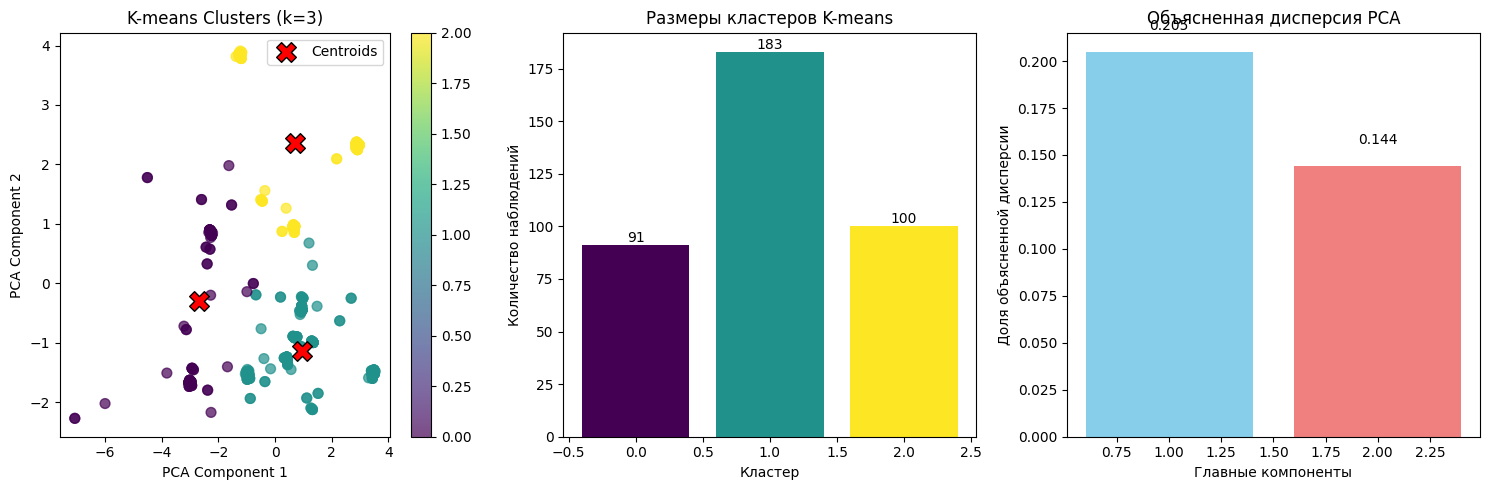


ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ:

Кластер 0 (n=91):
Возраст: 36.7 лет
Длительность сна: 6.3 часов
Качество сна: 5.9/10
Уровень стресса: 7.2/10
Физическая активность: 39.5 мин/день

Кластер 1 (n=183):
Возраст: 40.0 лет
Длительность сна: 7.7 часов
Качество сна: 8.0/10
Уровень стресса: 4.6/10
Физическая активность: 63.5 мин/день

Кластер 2 (n=100):
Возраст: 51.1 лет
Длительность сна: 6.9 часов
Качество сна: 7.3/10
Уровень стресса: 5.2/10
Физическая активность: 69.2 мин/день


In [ ]:
from sklearn.cluster import KMeans

initial_k = 3
print(f"Выполняем K-means кластеризацию с k={initial_k}...")

kmeans_initial = KMeans(n_clusters=initial_k, random_state=42, n_init=10)
kmeans_labels_initial = kmeans_initial.fit_predict(df_scaled)

# Добавляем метки кластеров в датафрейм
df_not_processed['kmeans_cluster'] = kmeans_labels_initial
print("Метки кластеров добавлены в df_not_processed")


print("Статистика по K-means кластерам:")
cluster_stats = df_not_processed.groupby('kmeans_cluster')[numeric_columns].mean()
print(cluster_stats.round(2))

# Анализ категориальных признаков по кластерам
categorical_columns_cluster = ['Gender', 'Occupation', 'BMI Category']
print("\nРаспределение категориальных признаков по кластерам:")
for col in categorical_columns_cluster:
    cross_tab = pd.crosstab(df_not_processed['kmeans_cluster'], df_not_processed[col])
    print(f"\n{col}:")
    print(cross_tab)

# Метрики качества кластеризации
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg = silhouette_score(df_scaled, kmeans_labels_initial)
calinski_harabasz = calinski_harabasz_score(df_scaled, kmeans_labels_initial)
davies_bouldin = davies_bouldin_score(df_scaled, kmeans_labels_initial)

print(f"\nМетрики качества для k={initial_k}:")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")

# Визуализация кластеров
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(15, 5))

# Визуализация в пространстве PCA
plt.subplot(1, 3, 1)
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels_initial, cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-means Clusters (k={initial_k})')

# Визуализация центроидов
centers_pca = pca.transform(kmeans_initial.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Centroids', edgecolors='black')
plt.legend()

# Размеры кластеров
plt.subplot(1, 3, 2)
cluster_sizes = df_not_processed['kmeans_cluster'].value_counts().sort_index()
colors = plt.cm.viridis(np.linspace(0, 1, len(cluster_sizes)))
bars = plt.bar(cluster_sizes.index, cluster_sizes.values, color=colors)
plt.xlabel('Кластер')
plt.ylabel('Количество наблюдений')
plt.title('Размеры кластеров K-means')
for i, v in enumerate(cluster_sizes.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Объяснение дисперсии PCA
plt.subplot(1, 3, 3)
explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, 3), explained_variance, color=['skyblue', 'lightcoral'])
plt.xlabel('Главные компоненты')
plt.ylabel('Доля объясненной дисперсии')
plt.title('Объясненная дисперсия PCA')
for i, v in enumerate(explained_variance):
    plt.text(i+1, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Интерпретация кластеров
print("\nИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ:")
for cluster in range(initial_k):
    cluster_data = df_not_processed[df_not_processed['kmeans_cluster'] == cluster][numeric_columns].mean()
    print(f"\nКластер {cluster} (n={cluster_sizes[cluster]}):")
    print(f"Возраст: {cluster_data['Age']:.1f} лет")
    print(f"Длительность сна: {cluster_data['Sleep Duration']:.1f} часов")
    print(f"Качество сна: {cluster_data['Quality of Sleep']:.1f}/10")
    print(f"Уровень стресса: {cluster_data['Stress Level']:.1f}/10")
    print(f"Физическая активность: {cluster_data['Physical Activity Level']:.1f} мин/день")



МЕТОД ЛОКТЯ ДЛЯ ОПТИМАЛЬНОГО ЧИСЛА КЛАСТЕРОВ


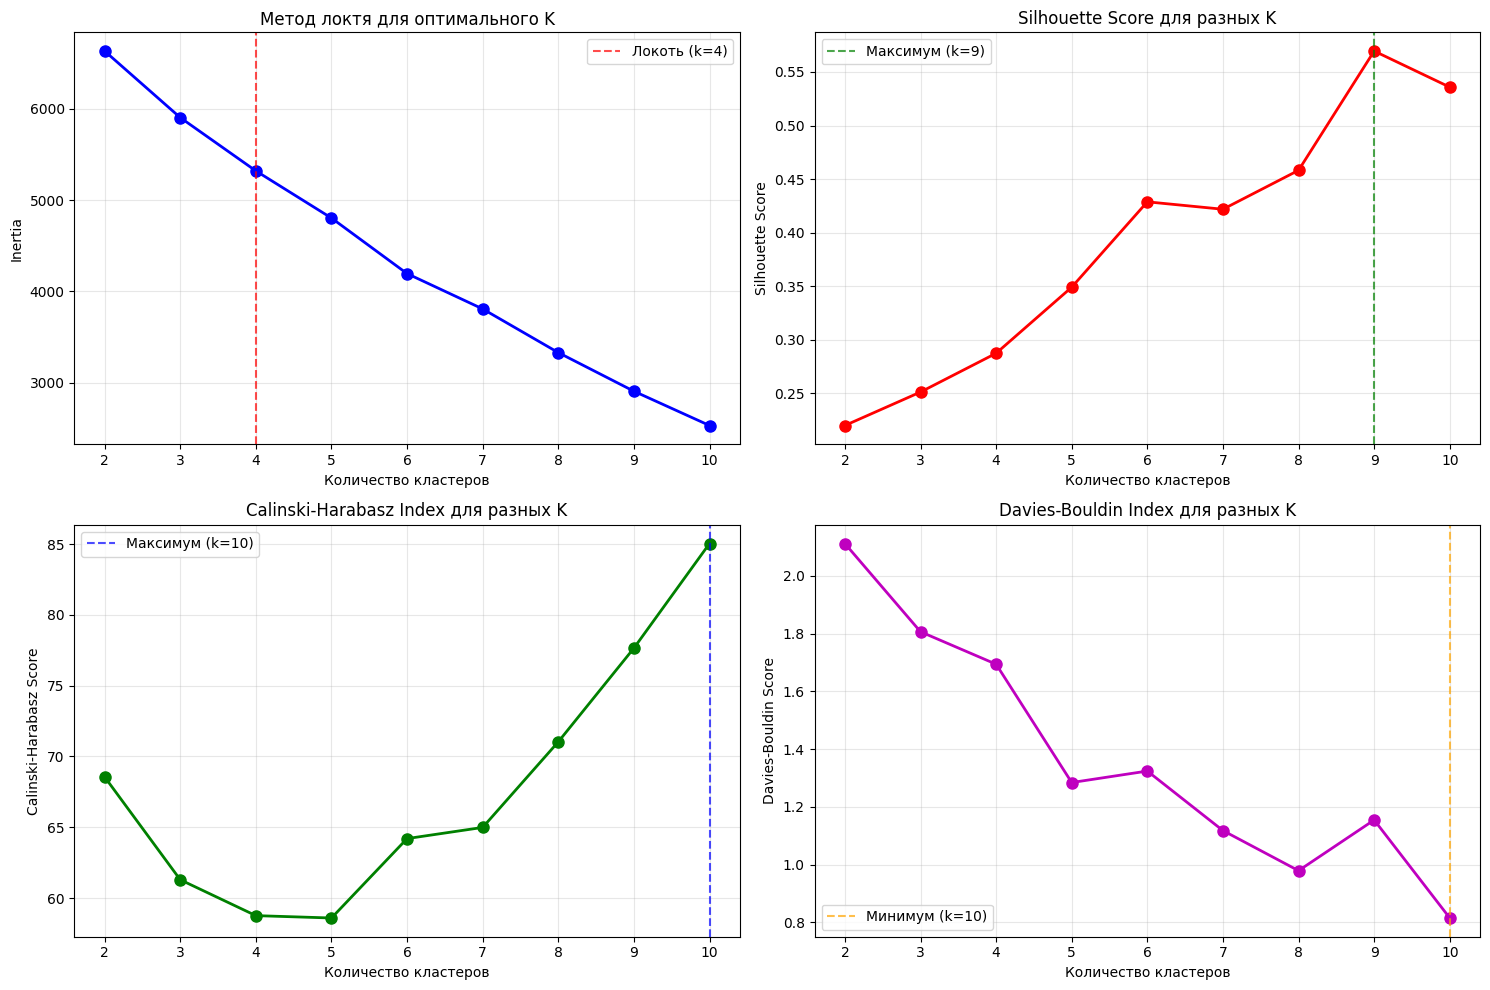


ОПТИМАЛЬНОЕ ЧИСЛО КЛАСТЕРОВ: 9

СРАВНЕНИЕ С ИСХОДНОЙ КЛАСТЕРИЗАЦИЕЙ (k=3):
Исходная кластеризация - Silhouette: 0.251
Оптимальная кластеризация - Silhouette: 0.570

ПОВТОРНАЯ КЛАСТЕРИЗАЦИЯ С ОПТИМАЛЬНЫМ k=9...
5. Рекомендуемое число кластеров: 9


In [ ]:
print("\nМЕТОД ЛОКТЯ ДЛЯ ОПТИМАЛЬНОГО ЧИСЛА КЛАСТЕРОВ")

inertia = []
silhouette_scores = []
calinski_scores = []
davies_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    inertia.append(kmeans.inertia_)

    if k > 1:
        silhouette_scores.append(silhouette_score(df_scaled, labels))
        calinski_scores.append(calinski_harabasz_score(df_scaled, labels))
        davies_scores.append(davies_bouldin_score(df_scaled, labels))

# Визуализация метода локтя и метрик
plt.figure(figsize=(15, 10))

# График инерции (метод локтя)
plt.subplot(2, 2, 1)
plt.plot(k_range, inertia, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя для оптимального K')
plt.grid(True, alpha=0.3)

# Автоматическое определение "локтя"
try:
    from kneed import KneeLocator
    kneedle = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
    elbow_k = kneedle.elbow if kneedle.elbow else 4
except:
    elbow_k = 4  # значение по умолчанию

plt.axvline(x=elbow_k, color='red', linestyle='--', alpha=0.7, label=f'Локоть (k={elbow_k})')
plt.legend()

# График silhouette score
plt.subplot(2, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-', markersize=8, linewidth=2)
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score для разных K')
plt.grid(True, alpha=0.3)
max_silhouette_k = k_range[np.argmax(silhouette_scores)]
plt.axvline(x=max_silhouette_k, color='green', linestyle='--', alpha=0.7,
            label=f'Максимум (k={max_silhouette_k})')
plt.legend()

# График Calinski-Harabasz
plt.subplot(2, 2, 3)
plt.plot(k_range, calinski_scores, 'go-', markersize=8, linewidth=2)
plt.xlabel('Количество кластеров')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Index для разных K')
plt.grid(True, alpha=0.3)
max_calinski_k = k_range[np.argmax(calinski_scores)]
plt.axvline(x=max_calinski_k, color='blue', linestyle='--', alpha=0.7,
            label=f'Максимум (k={max_calinski_k})')
plt.legend()

# График Davies-Bouldin
plt.subplot(2, 2, 4)
plt.plot(k_range, davies_scores, 'mo-', markersize=8, linewidth=2)
plt.xlabel('Количество кластеров')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Index для разных K')
plt.grid(True, alpha=0.3)
min_davies_k = k_range[np.argmin(davies_scores)]
plt.axvline(x=min_davies_k, color='orange', linestyle='--', alpha=0.7,
            label=f'Минимум (k={min_davies_k})')
plt.legend()

plt.tight_layout()
plt.show()

# Определяем оптимальное k
optimal_k = max_silhouette_k
print(f"\nОПТИМАЛЬНОЕ ЧИСЛО КЛАСТЕРОВ: {optimal_k}")

# Сравнение с исходной кластеризацией
print(f"\nСРАВНЕНИЕ С ИСХОДНОЙ КЛАСТЕРИЗАЦИЕЙ (k={initial_k}):")
print(f"Исходная кластеризация - Silhouette: {silhouette_avg:.3f}")
print(f"Оптимальная кластеризация - Silhouette: {silhouette_scores[optimal_k-2]:.3f}")

# КЛАСТЕРИЗАЦИЯ С ОПТИМАЛЬНЫМ K
print(f"\nПОВТОРНАЯ КЛАСТЕРИЗАЦИЯ С ОПТИМАЛЬНЫМ k={optimal_k}...")
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels_optimal = kmeans_optimal.fit_predict(df_scaled)

# Добавляем оптимальные кластеры в датафрейм
df_not_processed['kmeans_cluster_optimal'] = kmeans_labels_optimal


print(f"5. Рекомендуемое число кластеров: {optimal_k}")

1. Сначала выполнена K-means кластеризация с выбранным k
2. Затем метод локтя показал оптимальное число кластеров
3. Метод локтя анализирует, где уменьшение inertia замедляется
4. Оптимальное k соответствует 'локтю' на графике





In [ ]:
# Метрики качества для K-means с оптимальным k=9
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels_optimal)  # используем оптимальные метки
kmeans_calinski = calinski_harabasz_score(df_scaled, kmeans_labels_optimal)
kmeans_davies = davies_bouldin_score(df_scaled, kmeans_labels_optimal)

print(f"\nМетрики качества K-means (k={optimal_k}):")
print(f"Silhouette Score: {kmeans_silhouette:.3f} (чем ближе к 1, тем лучше)")
print(f"Calinski-Harabasz Index: {kmeans_calinski:.3f} (чем выше, тем лучше)")
print(f"Davies-Bouldin Index: {kmeans_davies:.3f} (чем ближе к 0, тем лучше)")

# Интерпретация кластеров
print(f"ИНТЕРПРЕТАЦИЯ K-MEANS КЛАСТЕРОВ (k={optimal_k}):")

# Детальный анализ каждого кластера - используем optimal_k
for cluster in range(optimal_k):  # теперь 9 кластеров
    cluster_data = df_not_processed[df_not_processed['kmeans_cluster_optimal'] == cluster]  # используем оптимальные кластеры
    print(f"\nКластер {cluster} (размер: {len(cluster_data)}, {len(cluster_data)/len(df_not_processed)*100:.1f}% данных):")

    # Числовые характеристики
    print("Числовые характеристики:")
    print(f"Средний возраст: {cluster_data['Age'].mean():.1f} лет")
    print(f"Продолжительность сна: {cluster_data['Sleep Duration'].mean():.1f} ч")
    print(f"Качество сна: {cluster_data['Quality of Sleep'].mean():.1f}/10")
    print(f"Уровень стресса: {cluster_data['Stress Level'].mean():.1f}/10")
    print(f"Физ. активность: {cluster_data['Physical Activity Level'].mean():.1f}")
    print(f"Дневные шаги: {cluster_data['Daily Steps'].mean():.0f}")

    # Категориальные характеристики
    print("Демографические характеристики:")
    for col in categorical_columns_cluster:
        most_common = cluster_data[col].value_counts().index[0]
        percentage = (cluster_data[col] == most_common).mean() * 100
        print(f"   {col}: {most_common} ({percentage:.1f}%)")


Метрики качества K-means (k=9):
Silhouette Score: 0.570 (чем ближе к 1, тем лучше)
Calinski-Harabasz Index: 77.649 (чем выше, тем лучше)
Davies-Bouldin Index: 1.155 (чем ближе к 0, тем лучше)
ИНТЕРПРЕТАЦИЯ K-MEANS КЛАСТЕРОВ (k=9):

Кластер 0 (размер: 38, 10.2% данных):
Числовые характеристики:
Средний возраст: 50.0 лет
Продолжительность сна: 8.2 ч
Качество сна: 8.8/10
Уровень стресса: 3.2/10
Физ. активность: 34.7
Дневные шаги: 5000
Демографические характеристики:
   Gender: Female (84.2%)
   Occupation: Engineer (100.0%)
   BMI Category: Normal (100.0%)

Кластер 1 (размер: 65, 17.4% данных):
Числовые характеристики:
Средний возраст: 31.0 лет
Продолжительность сна: 6.9 ч
Качество сна: 6.5/10
Уровень стресса: 7.0/10
Физ. активность: 53.1
Дневные шаги: 6908
Демографические характеристики:
   Gender: Male (100.0%)
   Occupation: Doctor (100.0%)
   BMI Category: Normal (100.0%)

Кластер 2 (размер: 39, 10.4% данных):
Числовые характеристики:
Средний возраст: 42.1 лет
Продолжительность сна: 

3. DBSCAN КЛАСТЕРИЗАЦИЯ
Подбор оптимальных параметров для DBSCAN...
Лучшие результаты подбора параметров DBSCAN:
    eps  min_samples  n_clusters  n_noise  silhouette
8   1.5            5          15       55       0.753
4   1.0            5          15       57       0.748
0   0.5            5          15       59       0.741
16  2.5            5          13       48       0.734
12  2.0            5          13       53       0.734
18  2.5           15          10       68       0.672
17  2.5           10          10       68       0.672
14  2.0           15          10       71       0.672
13  2.0           10          10       71       0.672
10  1.5           15          11       79       0.668

Оптимальные параметры DBSCAN: eps=1.5, min_samples=5
Результаты DBSCAN:
Количество кластеров: 15
Точек шума: 55
Процент шума: 14.7%

Метрики качества DBSCAN:
Silhouette Score: 0.753
Calinski-Harabasz Index: 42.888
Davies-Bouldin Index: 1.431


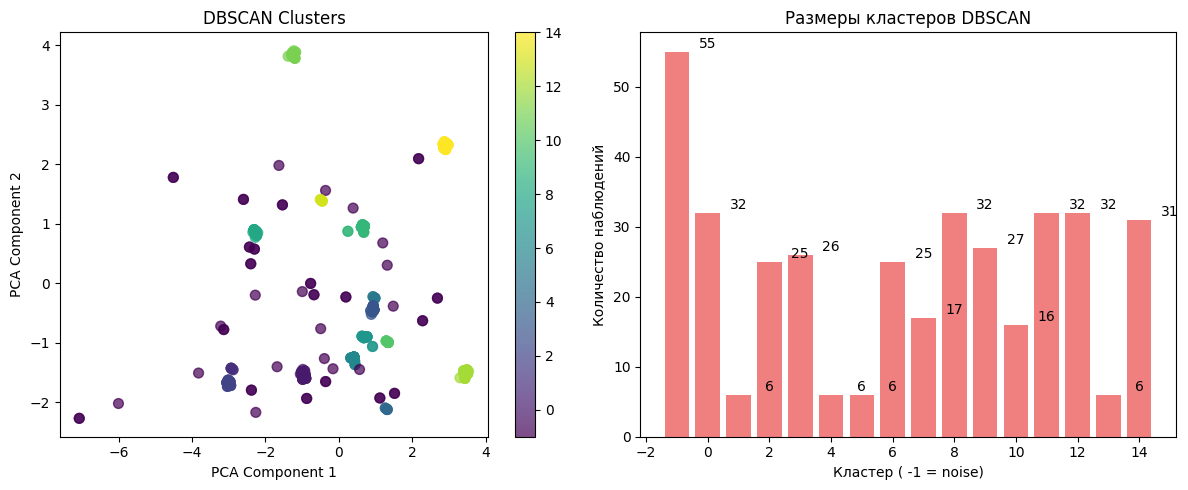


ИНТЕРПРЕТАЦИЯ DBSCAN КЛАСТЕРОВ:

Кластер 0 (размер: 32):
  Средний возраст: 30.5
  Средняя продолжительность сна: 7.7 ч
  Среднее качество сна: 7.0/10
  Средний уровень стресса: 6.0/10

Кластер 1 (размер: 6):
  Средний возраст: 29.0
  Средняя продолжительность сна: 6.0 ч
  Среднее качество сна: 6.0/10
  Средний уровень стресса: 8.0/10

Кластер 2 (размер: 25):
  Средний возраст: 32.3
  Средняя продолжительность сна: 6.1 ч
  Среднее качество сна: 6.0/10
  Средний уровень стресса: 8.0/10

Кластер 3 (размер: 26):
  Средний возраст: 37.1
  Средняя продолжительность сна: 7.2 ч
  Среднее качество сна: 8.0/10
  Средний уровень стресса: 4.0/10

Кластер 4 (размер: 6):
  Средний возраст: 35.0
  Средняя продолжительность сна: 7.3 ч
  Среднее качество сна: 8.0/10
  Средний уровень стресса: 4.0/10

Кластер 5 (размер: 6):
  Средний возраст: 36.0
  Средняя продолжительность сна: 7.2 ч
  Среднее качество сна: 8.0/10
  Средний уровень стресса: 4.0/10

Кластер 6 (размер: 25):
  Средний возраст: 38.3
  С

In [ ]:
# DBSCAN КЛАСТЕРИЗАЦИЯ
print("DBSCAN КЛАСТЕРИЗАЦИЯ")
# Подбор параметров для DBSCAN
def evaluate_dbscan(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(df_scaled, labels)
        calinski = calinski_harabasz_score(df_scaled, labels)
        davies = davies_bouldin_score(df_scaled, labels)
    else:
        silhouette = -1
        calinski = -1
        davies = 10

    return n_clusters, n_noise, silhouette, calinski, davies, labels

# Тестируем разные параметры
print("Подбор оптимальных параметров для DBSCAN...")
results = []
eps_values = [0.5, 1.0, 1.5, 2.0, 2.5]
min_samples_values = [5, 10, 15, 20]

best_score = -1
best_params = None
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        n_clusters, n_noise, silhouette, calinski, davies, labels = evaluate_dbscan(eps, min_samples)

        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': silhouette
        })

        if silhouette > best_score and n_clusters >= 2:
            best_score = silhouette
            best_params = (eps, min_samples)
            best_labels = labels

# Выводим результаты подбора параметров
results_df = pd.DataFrame(results)
print("Лучшие результаты подбора параметров DBSCAN:")
print(results_df.sort_values('silhouette', ascending=False).head(10).round(3))

# Обучаем DBSCAN с оптимальными параметрами
if best_params is not None:
    optimal_eps, optimal_min_samples = best_params
    print(f"\nОптимальные параметры DBSCAN: eps={optimal_eps}, min_samples={optimal_min_samples}")

    dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
    dbscan_labels = dbscan_optimal.fit_predict(df_scaled)

    # Добавляем кластеры в исходный датафрейм
    df_not_processed['dbscan_cluster'] = dbscan_labels

    # Анализ DBSCAN кластеров
    n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise_dbscan = list(dbscan_labels).count(-1)

    print(f"Результаты DBSCAN:")
    print(f"Количество кластеров: {n_clusters_dbscan}")
    print(f"Точек шума: {n_noise_dbscan}")
    print(f"Процент шума: {(n_noise_dbscan/len(df_scaled))*100:.1f}%")

    # Метрики качества для DBSCAN
    if n_clusters_dbscan > 1:
        dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
        dbscan_calinski = calinski_harabasz_score(df_scaled, dbscan_labels)
        dbscan_davies = davies_bouldin_score(df_scaled, dbscan_labels)
    else:
        dbscan_silhouette = -1
        dbscan_calinski = -1
        dbscan_davies = 10

    print(f"\nМетрики качества DBSCAN:")
    print(f"Silhouette Score: {dbscan_silhouette:.3f}")
    print(f"Calinski-Harabasz Index: {dbscan_calinski:.3f}")
    print(f"Davies-Bouldin Index: {dbscan_davies:.3f}")

    # Визуализация DBSCAN кластеров
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7, s=50)
    plt.colorbar(scatter)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('DBSCAN Clusters')

    plt.subplot(1, 2, 2)
    cluster_sizes_dbscan = df_not_processed['dbscan_cluster'].value_counts().sort_index()
    plt.bar(cluster_sizes_dbscan.index, cluster_sizes_dbscan.values, color='lightcoral')
    plt.xlabel('Кластер ( -1 = noise)')
    plt.ylabel('Количество наблюдений')
    plt.title('Размеры кластеров DBSCAN')
    for i, v in enumerate(cluster_sizes_dbscan.values):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Интерпретация DBSCAN кластеров
    if n_clusters_dbscan > 0:
        print("\nИНТЕРПРЕТАЦИЯ DBSCAN КЛАСТЕРОВ:")
        print("="*50)
        for cluster in sorted(set(dbscan_labels)):
            if cluster == -1:
                continue
            cluster_data = df_not_processed[df_not_processed['dbscan_cluster'] == cluster]
            print(f"\nКластер {cluster} (размер: {len(cluster_data)}):")
            print(f"  Средний возраст: {cluster_data['Age'].mean():.1f}")
            print(f"  Средняя продолжительность сна: {cluster_data['Sleep Duration'].mean():.1f} ч")
            print(f"  Среднее качество сна: {cluster_data['Quality of Sleep'].mean():.1f}/10")
            print(f"  Средний уровень стресса: {cluster_data['Stress Level'].mean():.1f}/10")
else:
    print("Не удалось найти подходящие параметры для DBSCAN")
    dbscan_labels = np.zeros(len(df_scaled)) - 1
    dbscan_silhouette = -1
    dbscan_calinski = -1
    dbscan_davies = 10
    n_clusters_dbscan = 0
    n_noise_dbscan = len(df_scaled)



СРАВНЕНИЕ МЕТОДОВ КЛАСТЕРИЗАЦИИ
Сравнительная таблица метрик:
               Metric K-means  DBSCAN
0    Silhouette Score   0.570   0.753
1   Calinski-Harabasz  77.649  42.888
2      Davies-Bouldin   1.155   1.431
3  Number of Clusters       9      15
4        Noise Points       0      55


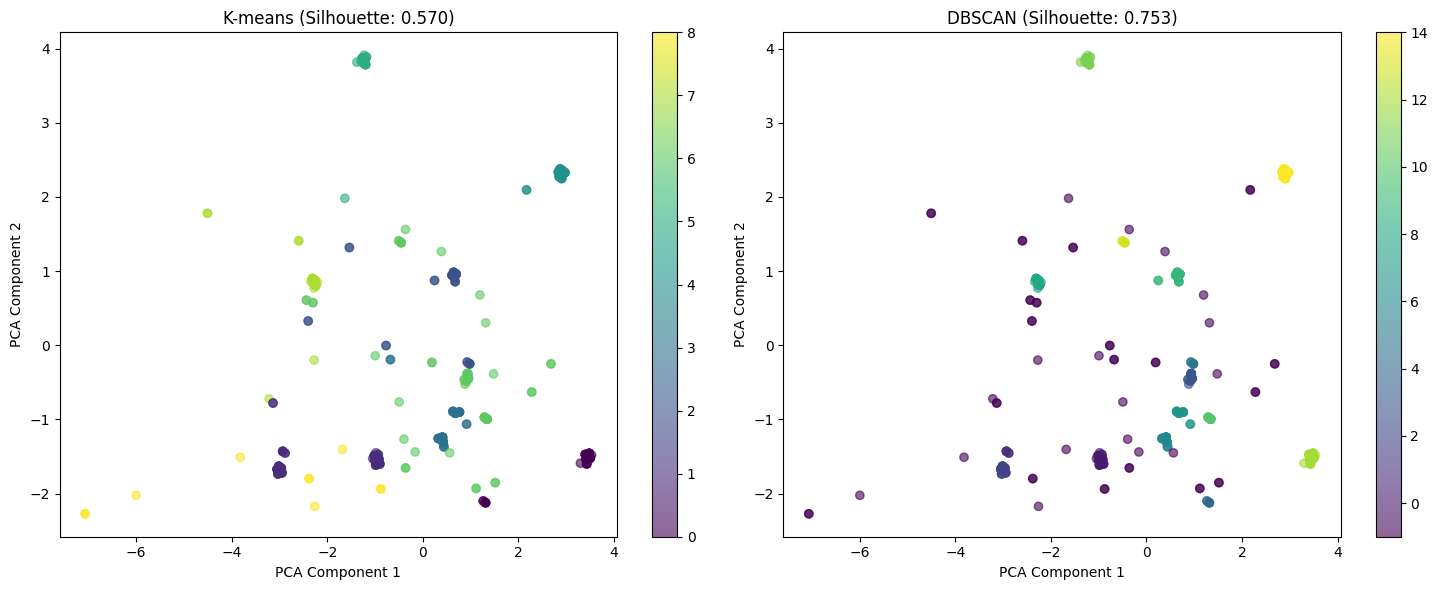

DBSCAN лучше подходит для этого датасета
Причины:
- Лучше справляется с кластерами произвольной формы
- Автоматически определяет выбросы
- Более высокий Silhouette Score

Рекомендуемый метод: DBSCAN
Лучший Silhouette Score: 0.753


In [ ]:
#СРАВНЕНИЕ МЕТОДОВ И ВЫВОДЫ
print("СРАВНЕНИЕ МЕТОДОВ КЛАСТЕРИЗАЦИИ")

# Сравнительная таблица метрик
comparison_data = {
    'Metric': ['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin', 'Number of Clusters', 'Noise Points'],
    'K-means': [
        f"{kmeans_silhouette:.3f}",
        f"{kmeans_calinski:.3f}",
        f"{kmeans_davies:.3f}",
        optimal_k,
        "0"
    ],
    'DBSCAN': [
        f"{dbscan_silhouette:.3f}",
        f"{dbscan_calinski:.3f}",
        f"{dbscan_davies:.3f}",
        n_clusters_dbscan,
        n_noise_dbscan
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("Сравнительная таблица метрик:")
print(comparison_df)

# Визуальное сравнение
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# K-means
scatter1 = axes[0].scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels_optimal, cmap='viridis', alpha=0.6)
axes[0].set_title(f'K-means (Silhouette: {kmeans_silhouette:.3f})')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

# DBSCAN
scatter2 = axes[1].scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6)
axes[1].set_title(f'DBSCAN (Silhouette: {dbscan_silhouette:.3f})')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

# Добавляем цветовые бары
plt.colorbar(scatter1, ax=axes[0])
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()


if kmeans_silhouette > dbscan_silhouette and kmeans_silhouette > 0.5:
    print("✅ K-MEANS лучше подходит для этого датасета")
    print("Причины:")
    print("- Более высокий Silhouette Score")
    print("- Четкие, хорошо разделенные кластеры")
    print("- Нет проблемы с шумовыми точками")
    print("- Стабильные результаты")

elif dbscan_silhouette > kmeans_silhouette and dbscan_silhouette > 0.5:
    print("DBSCAN лучше подходит для этого датасета")
    print("Причины:")
    print("- Лучше справляется с кластерами произвольной формы")
    print("- Автоматически определяет выбросы")
    print("- Более высокий Silhouette Score")

else:
    print("Оба метода показывают посредственные результаты")


print(f"\nРекомендуемый метод: {'K-MEANS' if kmeans_silhouette > dbscan_silhouette else 'DBSCAN'}")
print(f"Лучший Silhouette Score: {max(kmeans_silhouette, dbscan_silhouette):.3f}")

